In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Theory

The Delta method: if $Y_n \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n} \right)$, then $g(Y_n) \sim \mathcal{N}\left(g(\mu), \left( g(\mu)' \right)^2\frac{\sigma^2}{n} \right)$, given $g$ is differentiable and $g'(\mu) \neq 0$.

ref: Section 5.5 The Delta Method of [All of Statistics](https://link.springer.com/book/10.1007/978-0-387-21736-9).

Proof:

Expand $g(Y_n)$ around $\mu$ with first-order Taylor series,

\begin{align*}
g(Y_n) 
&\approx g(\mu) + g'(\mu)(Y_n - \mu) \\
\end{align*}

Note,

\begin{align*}
Y_n - \mu
&\sim \mathcal{N}\left(0, \frac{\sigma^2}{n} \right) \\
g'(\mu)(Y_n - \mu)
&\sim \mathcal{N}\left(0, g'(\mu)^2 \frac{\sigma^2}{n} \right) \\
g(\mu) + g'(\mu)(Y_n - \mu)
&\sim \mathcal{N}\left(g(\mu), g'(\mu)^2 \frac{\sigma^2}{n} \right)
\end{align*}

Q.E.D.

The name delta could refer to the changes in $Y_n$ when calculating $g'$.

# Demo

Let $g(t) = e^t$, so $g(t)' = e^t$.

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def g(t):
    return np.exp(t)

g_prime = g

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1681.12it/s]


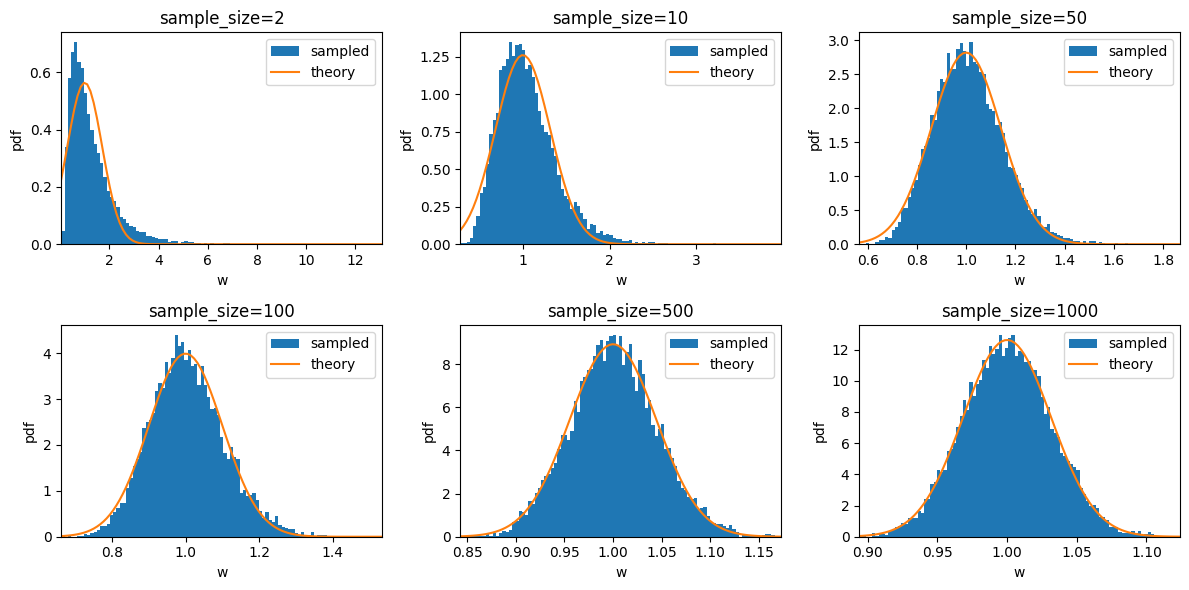

In [4]:
mu = 0  # population mean
sigma = 1  # population variance
sample_sizes = [2, 10, 50, 100, 500, 1000] # aka. n
num_samples = 10000

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for index, sample_size in enumerate(sample_sizes):
    ax = axes[index]

    w_vals = []  # to hold transformed values.
    for i in tqdm(range(num_samples)):
        xs = scipy.stats.norm(loc=mu, scale=sigma).rvs(sample_size)
        x_bar = np.mean(xs)
        w_vals.append(np.exp(x_bar))

    norm_transformed = scipy.stats.norm(
        loc=g(mu), scale=np.sqrt(g_prime(mu) ** 2 * sigma**2 / sample_size)
    )

    w_min, w_max = min(w_vals), max(w_vals)
    bins = np.linspace(w_min, w_max, 100)

    _ = ax.hist(w_vals, bins=bins, density=True, label="sampled")
    _ = ax.plot(bins, norm_transformed.pdf(bins), label="theory")
    ax.legend()
    ax.set(xlabel="w", ylabel="pdf", title=f"{sample_size=:}", xlim=[w_min, w_max])

plt.tight_layout()

Note the approximation becomes pretty good when $n=100$.